# Overfitting & Cross Validation

<p style="display:flex">
    <img src="https://raw.githubusercontent.com/Sayan-Roy-729/Data-Science/main/Deep%20Learning/Using%20Pytorch/Part%204%20-%20Overfitting%20%26%20CrossValidation/images/image-1.jpeg?token=GHSAT0AAAAAABY4P3FRFAAKSAC3BD7QPEUEYZMAHGQ" style="border-radius:10px" width=500/>
</p>

**How to know the correct number of parameters?**
- `With 1-2 dimensions`: Visualize the data and make an  informed decision.
- `With 3+ dimensions:` Use cross-validation

**How to avoid overfitting?**
- Use cross-validation (training/hold-out/test sets)
- Use regularization (l2, drop-out, data manipulations, early stopping)

**Hidden Overfitting: "researcher degrees of freedom"**
- "Researcher degrees of freedom": The researcher has many choices for how to clean, organize and select the data; and which models and how many models to run.
- Example: Test models A, B and C on the same data. Go back and clean the data again with different criteria, then test the tree models again. Publish model B with re-cleaned data, which worked best on the test set.

**How to avoid researcher overfitting:**
- Decide on the model architecture in advance and make only minor adjustments. Feasible for frequently-studied problems.
- Build a series of models but never use the test set until all models are trained (kaggle-like competition). Best for new problems or new models.

## Cross-Validation

<p style="display:flex">
    <img src="https://raw.githubusercontent.com/Sayan-Roy-729/Data-Science/main/Deep%20Learning/Using%20Pytorch/Part%204%20-%20Overfitting%20%26%20CrossValidation/images/image-3.png?token=GHSAT0AAAAAABY4P3FQBXVBKBUBNYZDSZUEYZMAH2A" style="border-radius:10px" width=500/>
</p>

<p style="display:flex">
    <img src="https://raw.githubusercontent.com/Sayan-Roy-729/Data-Science/main/Deep%20Learning/Using%20Pytorch/Part%204%20-%20Overfitting%20%26%20CrossValidation/images/image-2.png?token=GHSAT0AAAAAABY4P3FRXAVJYPUIIZLWLNL4YZMAIRA" style="border-radius:10px" width=500/>
</p>



**Does cross-validation really prevent overfitting?**
- *Crucial assumption of cross-validation*: The hold-out and test sets are independent of (uncorrelated with) the training set.
- *Example of assumption validity*: Train a model to label pictures of pets as "cat", "dog", "bird" or "wallabee". Test set is pictures taken by people whose pictures were not in the training or hold-out sets.
- *Example of assumption violation*: Train a model to predict age based on pictures of people's face. Test set is pictures of their siblings.
- *Example of assumption violation*: Train a model to predict market value of homes. Training set is randomly selected homes in a city. Test set is homes next door.

<p>
    <img src="./images/image-4.png" width=500 style="border-radisu:10px" />
</p>

## Generalization

**Generalization:** The model works well when applied to new data.

**Generalization boundaries:** The population you want to apply the model to.

**Simple example:** $weight = \beta_1{height} + \beta_2{calories}$

*Generalization boundaries:*
- Must work on adult humans (both sexes, all countries)
- Doesn't need to work on children.
- Doesn't need to work on non-human animals.

<p>
    <img src="./images/image-5.png" width=500 style="border-radius:10px"/>
</p>

**Important:**
- Generalization entails some loss of accuracy!
- The trick is to build a model that does well within the generalization boundaries.
- Decide your generalization boundaries carefully.
- Have examples from those populations in the training/hold-out/test sets.

## Cross-Validation -- Manual Separation

In [2]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns

In [3]:
# import dataset (comes with seaborn)
iris = sns.load_dataset('iris')


# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica']  = 2

### Separate Data into Train and Test

In [4]:
#  (no devset here)

# how many training examples
propTraining = .8 # in proportion, not percent
nTraining = int(len(labels)*propTraining)

# initialize a boolean vector to select data and labels
traintestBool = np.zeros(len(labels), dtype=bool)

# is this the correct way to select samples?
# traintestBool[range(nTraining)] = True

# this is better, but why?
items2use4train = np.random.choice(range(len(labels)), nTraining, replace=False)
traintestBool[items2use4train] = True

traintestBool

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,

In [5]:
# test whether it's balanced
print('Average of full data:')
print( torch.mean(labels.float()) ) # =1 by definition
print(' ')

print('Average of training data:')
print( torch.mean(labels[traintestBool].float()) ) # should be 1...
print(' ')

print('Average of test data:')
print( torch.mean(labels[~traintestBool].float()) ) # should also be 1...

Average of full data:
tensor(1.)
 
Average of training data:
tensor(0.9667)
 
Average of test data:
tensor(1.1333)


In [6]:
# create the ANN model

# model architecture
ANNiris = nn.Sequential(
    nn.Linear(in_features=4, out_features=64),   # input layer
    nn.ReLU(),         # activation unit
    nn.Linear(in_features=64, out_features=64),  # hidden layer
    nn.ReLU(),         # activation unit
    nn.Linear(in_features=64, out_features=3),   # output units
)

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

In [7]:
# entire dataset
print( data.shape )

# training set
print( data[traintestBool,:].shape )

# test set
print( data[~traintestBool,:].shape )

torch.Size([150, 4])
torch.Size([120, 4])
torch.Size([30, 4])


### Train and Test the Model

In [8]:
# train the model

numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

    # forward pass
    yHat = ANNiris(data[traintestBool,:])

    # compute accuracy (note: denser than previous code!)
    ongoingAcc.append( 100*torch.mean(
              (torch.argmax(yHat,axis=1) == labels[traintestBool]).float()) )

    # compute loss
    loss = lossfun(yHat, labels[traintestBool])
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [9]:
# compute train and test accuracies

# final forward pass USING TRAINING DATA
predictions = ANNiris(data[traintestBool,:])
trainacc    = 100*torch.mean((torch.argmax(predictions,axis=1) == labels[traintestBool]).float())


# final forward pass USING TEST DATA!
predictions = ANNiris(data[~traintestBool,:])
testacc     = 100*torch.mean((torch.argmax(predictions,axis=1) == labels[~traintestBool]).float())

In [10]:
# report accuracies

print('Final TRAIN accuracy: %g%%' %trainacc)
print('Final TEST accuracy:  %g%%' %testacc)

Final TRAIN accuracy: 98.3333%
Final TEST accuracy:  96.6667%


In [ ]:
# normally also inspect losses and accuracy by epoch, etc etc etc.

In [ ]:
# 1) Randomly assigning data samples to be in the train vs test phase produced a statistical balance, but it was 
#    not perfect. Write an algorithm that will guarantee a balance of flower types while also randomly assigning
#    samples to be in train vs. test.
# 
# 2) Revert the code to its original form -- with the strong imbalance in flower types. Then train the model. What are
#    the train and test accuracies? Compute the accuracy separately for each type of flower to see whether the model
#    learned some categories, or whether it performed equally on all three categories. Are you surprised at the results? 

## Cross-Validation -- ScikitLearn

**Why an 80/20 split?**
- General idea: Have as much training data as possible, while still have enough holdout and test data.
- How much is "enough?" --> Depends on the data, model architechture, generalizability etc.

In [10]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# NEW!
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

### A brief Aside on Using `train_test_split`

In [3]:
# create our fake dataset

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [4]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = \
                        train_test_split(fakedata, fakelabels, test_size=.2)

# NOTE the third input parameter above.
# This can be specified as test size or training size.
# Be mindful of which parameter is written!



# print out the sizes
print('Training data size: ' + str(train_data.shape))
print('Test data size: ' + str(test_data.shape))
print(' ')

# print out the train/test data
print('Training data: ')
print(train_data)
print(' ')

print('Test data: ')
print(test_data)

Training data size: (8, 4)
Test data size: (2, 4)
 
Training data: 
[[ 31  32  33  34]
 [ 91  92  93  94]
 [ 51  52  53  54]
 [ 41  42  43  44]
 [ 61  62  63  64]
 [ 11  12  13  14]
 [ 71  72  73  74]
 [101 102 103 104]]
 
Test data: 
[[81 82 83 84]
 [21 22 23 24]]


### Now Back to The Model

In [5]:
# a function that creates the ANN model

def createANewModel():

    # model architecture
    ANNiris = nn.Sequential(
      nn.Linear(in_features=4, out_features=64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(in_features=64, out_features=64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(in_features=64, out_features=3),   # output units
    )

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)

    return ANNiris, lossfun, optimizer

In [7]:
# train the model

# global parameter
numepochs = 200

def trainTheModel(trainProp):

    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc  = []
    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp)

    # loop over epochs
    for epochi in range(numepochs):

        # separate train from test data
        # Note 1: unique split for each epoch!
        # Note 2: here we specify the training size, not the testing size!

        # forward pass and loss
        yHat = ANNiris(X_train)
        loss = lossfun(yHat,y_train)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # compute training accuracy
        trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )

        # test accuracy
        predlabels = torch.argmax( ANNiris(X_test),axis=1 )
        testAcc.append( 100*torch.mean((predlabels == y_test).float()).item() )
  
    # function output
    return trainAcc, testAcc

### Test the model by running it once

In [12]:
# create a model
ANNiris, lossfun, optimizer = createANewModel()

# train the model
# NOTE: the input is the training proportion, not the test proportion!
trainAcc,testAcc = trainTheModel(.8)

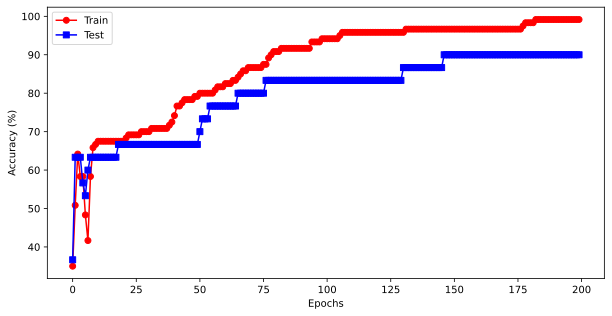

In [13]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])
plt.show()

### Now for the experiment

In [14]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc  = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):
  
    # create a model
    ANNiris,lossfun,optimizer = createANewModel()
  
    # train the model
    trainAcc,testAcc = trainTheModel(trainSetSizes[i])
  
    # store the results
    allTrainAcc[i,:] = trainAcc
    allTestAcc[i,:] = testAcc

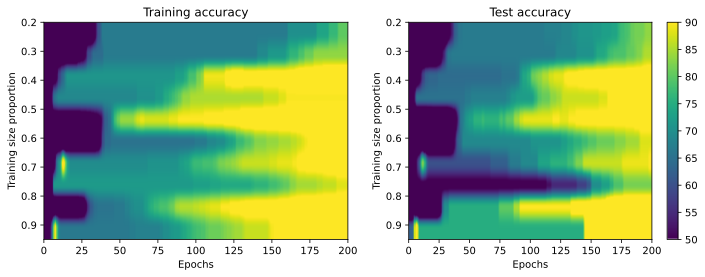

In [16]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()

In [ ]:
# 1) The images above suggest that the training proportion doesn't really affect learning success (for this data and this
#    model). Does increasing the number of epochs to 1000 change the conclusion? How about with a lr=.001?
# 
# 2) According to the help doc for train_test_split(), the train_size input can be either a float between 0.0 and 1.0, or
#    an int. Here we only used float inputs to indicate the proportion of the data used for training. Modify the code to
#    specify the training size as an integer corresponding to the number of samples.

## CrossValidation - DataLoader:

In [17]:
# import libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# new!
from torch.utils.data import DataLoader, TensorDataset

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [18]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')


# convert from pandas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica']  = 2

###  A brief aside on using DataLoader

In [19]:
# create our fake dataset

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


In [20]:
# dataloader object with all data
fakedataLdr = DataLoader(fakedata, shuffle=True)
print( fakedataLdr )
print( fakedataLdr.batch_size )

1


In [21]:
# iterate through the data
for i,oneSample in enumerate(fakedataLdr):
    print(i, oneSample, oneSample.shape)

# but where are the labels??

0 tensor([[91, 92, 93, 94]], dtype=torch.int32) torch.Size([1, 4])
1 tensor([[41, 42, 43, 44]], dtype=torch.int32) torch.Size([1, 4])
2 tensor([[71, 72, 73, 74]], dtype=torch.int32) torch.Size([1, 4])
3 tensor([[31, 32, 33, 34]], dtype=torch.int32) torch.Size([1, 4])
4 tensor([[81, 82, 83, 84]], dtype=torch.int32) torch.Size([1, 4])
5 tensor([[101, 102, 103, 104]], dtype=torch.int32) torch.Size([1, 4])
6 tensor([[11, 12, 13, 14]], dtype=torch.int32) torch.Size([1, 4])
7 tensor([[21, 22, 23, 24]], dtype=torch.int32) torch.Size([1, 4])
8 tensor([[61, 62, 63, 64]], dtype=torch.int32) torch.Size([1, 4])
9 tensor([[51, 52, 53, 54]], dtype=torch.int32) torch.Size([1, 4])


In [22]:
# we need to create a Dataset that contains the data and labels
fakeDataset = torch.utils.data.TensorDataset(torch.Tensor(fakedata), torch.Tensor(fakelabels))
print( fakeDataset.tensors ), print(' ')

# then create another DataLoader
fakedataLdr = DataLoader(fakeDataset, shuffle=True)

# iterate through the data
for dat,lab in fakedataLdr:
    print(dat,lab)

(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))
 
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[11., 12., 13., 14.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[31., 32., 33., 34.]]) tensor([0.])


In [23]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(fakedata, fakelabels, test_size=.2)

# then convert them into PyTorch Datasets
train_data = torch.utils.data.TensorDataset(
     torch.Tensor(train_data),torch.Tensor(train_labels))

test_data = torch.utils.data.TensorDataset(
     torch.Tensor(test_data),torch.Tensor(test_labels))

# finally, translate into dataloader objects
# notice the batches (see next cell)!
train_loader = DataLoader(train_data, batch_size=4)
test_loader  = DataLoader(test_data)

In [24]:
# examine the contents of the dataloader (batching is an advantage of dataloader!)
print('TRAINING DATA')
for batch,label in train_loader: # iterable
    print(batch,label)
    print(' ')


print(' ')
print('TESTING DATA')
for batch,label in test_loader: # iterable
    print(batch,label)
    print(' ')

TRAINING DATA
tensor([[11., 12., 13., 14.],
        [91., 92., 93., 94.],
        [81., 82., 83., 84.],
        [51., 52., 53., 54.]]) tensor([0., 1., 1., 0.])
 
tensor([[ 31.,  32.,  33.,  34.],
        [101., 102., 103., 104.],
        [ 41.,  42.,  43.,  44.],
        [ 61.,  62.,  63.,  64.]]) tensor([0., 1., 0., 1.])
 
 
TESTING DATA
tensor([[71., 72., 73., 74.]]) tensor([1.])
 
tensor([[21., 22., 23., 24.]]) tensor([0.])
 


### Now back to the real data!

In [25]:
# use scikitlearn to split the data
train_data, test_data, train_labels,test_labels = train_test_split(data, labels, train_size=.8)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = torch.utils.data.TensorDataset(train_data,train_labels)
test_data  = torch.utils.data.TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader  = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [26]:
# check sizes of data batches
for X,y in train_loader:
    print(X.shape, y.shape)

X,y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[6.3000, 3.3000, 6.0000, 2.5000],
         [5.9000, 3.0000, 4.2000, 1.5000],
         [4.4000, 2.9000, 1.4000, 0.2000],
         [6.3000, 2.8000, 5.1000, 1.5000],
         [4.9000, 3.1000, 1.5000, 0.2000],
         [6.5000, 3.0000, 5.5000, 1.8000],
         [7.2000, 3.6000, 6.1000, 2.5000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [5.4000, 3.9000, 1.7000, 0.4000],
         [5.0000, 2.3000, 3.3000, 1.0000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [7.7000, 2.8000, 6.7000, 2.0000]]),
 tensor([2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2]))

In [28]:
# check sizes of data batches
for X,y in test_loader:
    print(X.shape, y.shape)

X,y

torch.Size([30, 4]) torch.Size([30])


(tensor([[5.5000, 3.5000, 1.3000, 0.2000],
         [6.1000, 3.0000, 4.6000, 1.4000],
         [6.8000, 2.8000, 4.8000, 1.4000],
         [5.2000, 3.4000, 1.4000, 0.2000],
         [6.2000, 2.9000, 4.3000, 1.3000],
         [6.5000, 3.2000, 5.1000, 2.0000],
         [5.7000, 4.4000, 1.5000, 0.4000],
         [5.6000, 3.0000, 4.1000, 1.3000],
         [5.5000, 4.2000, 1.4000, 0.2000],
         [5.5000, 2.4000, 3.8000, 1.1000],
         [5.3000, 3.7000, 1.5000, 0.2000],
         [6.7000, 3.3000, 5.7000, 2.1000],
         [6.9000, 3.1000, 5.4000, 2.1000],
         [5.0000, 3.5000, 1.6000, 0.6000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [6.7000, 3.1000, 4.7000, 1.5000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [6.5000, 3.0000, 5.2000, 2.0000],
         [6.9000, 3.1000, 4.9000, 1.5000],
         [5.1000, 3.8000, 1.6000, 0.2000],
         [7.2000, 3.2000, 6.0000, 1.8000],
         [5.0000, 3.6000, 1.4000, 0.2000],
         [5

In [29]:
# a function that creates the ANN model

def createANewModel():

    # model architecture
    ANNiris = nn.Sequential(
      nn.Linear(in_features=4, out_features=64),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(in_features=64, out_features=64),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(in_features=64, out_features=3),   # output units
    )

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)

    return ANNiris,lossfun,optimizer

In [30]:
# train the model

# global parameter
numepochs = 500

def trainTheModel():

    # initialize accuracies as empties (not storing losses here)
    trainAcc = []
    testAcc  = []

    # loop over epochs
    for epochi in range(numepochs):


        # loop over training data batches
        batchAcc = []
        for X,y in train_loader:

            # forward pass and loss
            yHat = ANNiris(X)
            loss = lossfun(yHat,y)
      
            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
        # end of batch loop...


        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # test accuracy
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        predlabels = torch.argmax( ANNiris(X),axis=1 )
        testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
  
    # function output
    return trainAcc,testAcc


### Modeling

In [31]:
# create a model
ANNiris, lossfun, optimizer = createANewModel()

# train the model
trainAcc, testAcc = trainTheModel()

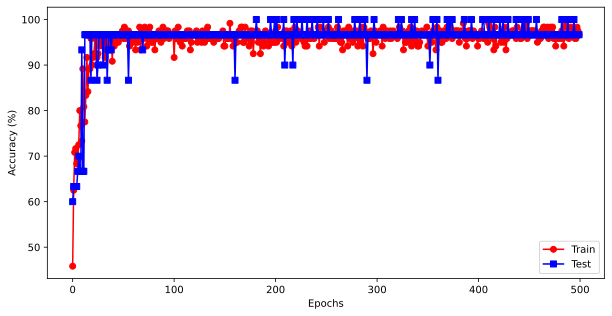

In [32]:
# plot the results
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()

In [ ]:
# 1) Read the help doc for the train_test_split() function, in particular to understand what the 'shuffle' option does.
#    What is the default value? Run the code again, switching the shuffling off. How does that affect model performance? Why?
# 
# 2) The model training loop does not keep track of the losses. Modify the code to store the loss value on each epoch, include
#    it as an output of the training function, and then make a plot of the training losses. Try to do it without looking
#    at other code files!

## Splitting Data into test, devset and test

In [33]:
### create fake dataset (same as in previous videos)

fakedata   = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T
fakelabels = np.arange(10)>4
print(fakedata), print(' ')
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
 
[False False False False False  True  True  True  True  True]


### Using train_test_split

In [35]:
# specify sizes of the partitions
# order is train,devset,test
partitions = [.8,.1,.1]

# split the data (note the third input, and the TMP in the variable name)
train_data,testTMP_data, train_labels,testTMP_labels = \
                   train_test_split(fakedata, fakelabels, train_size=partitions[0])

# now split the TMP data
split = partitions[1] / np.sum(partitions[1:])
devset_data,test_data, devset_labels,test_labels = \
              train_test_split(testTMP_data, testTMP_labels, train_size=split)




# print out the sizes
print('Training data size: ' + str(train_data.shape))
print('Devset data size: '   + str(devset_data.shape))
print('Test data size: '     + str(test_data.shape))
print(' ')

# print out the train/test data
print('Training data: ')
print(train_data)
print(' ')

print('Devset data: ')
print(devset_data)
print(' ')

print('Test data: ')
print(test_data)

Training data size: (8, 4)
Devset data size: (1, 4)
Test data size: (1, 4)
 
Training data: 
[[ 71  72  73  74]
 [101 102 103 104]
 [ 91  92  93  94]
 [ 11  12  13  14]
 [ 51  52  53  54]
 [ 81  82  83  84]
 [ 21  22  23  24]
 [ 41  42  43  44]]
 
Devset data: 
[[61 62 63 64]]
 
Test data: 
[[31 32 33 34]]


### Splitting the data manually using numpy

In [36]:
# partition sizes in proportion
partitions = np.array([.8,.1,.1])
print('Partition proportions:')
print(partitions)
print(' ')

# convert those into integers
partitionBnd = np.cumsum(partitions*len(fakelabels)).astype(int)
print('Partition boundaries:')
print(partitionBnd)
print(' ')


# random indices
randindices = np.random.permutation(range(len(fakelabels)))
print('Randomized data indices:')
print(randindices)
print(' ')

Partition proportions:
[0.8 0.1 0.1]
 
Partition boundaries:
[ 8  9 10]
 
Randomized data indices:
[3 6 0 1 7 2 5 4 9 8]
 


In [37]:
# select rows for the training data
train_dataN   = fakedata[randindices[:partitionBnd[0]],:]
train_labelsN = fakelabels[randindices[:partitionBnd[0]]]

# select rows for the devset data
devset_dataN   = fakedata[randindices[partitionBnd[0]:partitionBnd[1]],:]
devset_labelsN = fakelabels[randindices[partitionBnd[0]:partitionBnd[1]]]

# select rows for the test data
test_dataN   = fakedata[randindices[partitionBnd[1]:],:]
test_labelsN = fakelabels[randindices[partitionBnd[1]:]]

In [38]:
# print out the sizes
print('Training data size: ' + str(train_dataN.shape))
print('Devset size: '        + str(devset_dataN.shape))
print('Test data size: '     + str(test_dataN.shape))
print(' ')

# print out the train/test data
print('Training data: ')
print(train_dataN)
print(' ')

print('Devset data: ')
print(devset_dataN)
print(' ')

print('Test data: ')
print(test_dataN)

Training data size: (8, 4)
Devset size: (1, 4)
Test data size: (1, 4)
 
Training data: 
[[41 42 43 44]
 [71 72 73 74]
 [11 12 13 14]
 [21 22 23 24]
 [81 82 83 84]
 [31 32 33 34]
 [61 62 63 64]
 [51 52 53 54]]
 
Devset data: 
[[101 102 103 104]]
 
Test data: 
[[91 92 93 94]]


## CrossValidation on Regression

### Create the data and the model

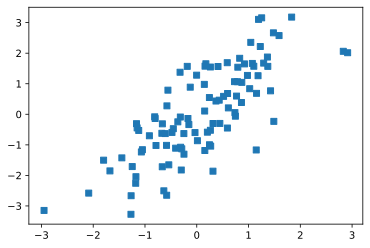

In [39]:
N = 100
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)

# and plot
plt.plot(x,y,'s')
plt.show()

In [40]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(in_features=1, out_features=1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(in_features=1, out_features=1)   # output layer
)

In [41]:
# model meta-parameters

learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

### Select data for training

In [42]:
# select training data (note the hard-coded N!)
trainidx  = np.random.choice(range(N),80,replace=False) # random indices
trainBool = np.zeros(N,dtype=bool) # initialize vector of Falses'
trainBool[trainidx] = True # set selected samples to True

# show the sizes
print(x[trainBool].shape)
print(x[~trainBool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


### Train the model

In [43]:
numepochs = 500
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x[trainBool])

    # compute loss
    loss = lossfun(yHat,y[trainBool])

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [44]:
# report the losses

# compute losses of the TEST set
predYtest = ANNreg(x[~trainBool])
testloss = (predYtest-y[~trainBool]).pow(2).mean()

# print out final TRAIN loss and TEST loss
print(f'Final TRAIN loss: {loss.detach():.2f}')
print(f'Final TEST loss: {testloss.detach():.2f}')

Final TRAIN loss: 0.87
Final TEST loss: 1.14


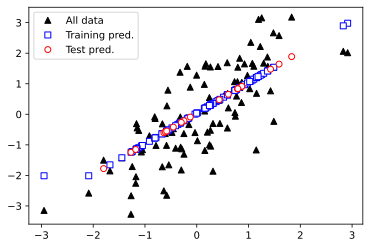

In [45]:
### plot the data

# predictions for final training run
predYtrain = ANNreg(x[trainBool]).detach().numpy()

# now plot
plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainBool], predYtrain,
         'bs',markerfacecolor='w',label='Training pred.')
plt.plot(x[~trainBool],predYtest.detach(),
         'ro',markerfacecolor='w',label='Test pred.')
plt.legend()
plt.show()

In [ ]:
# 1) The train/test split is currently hard-coded to be 80/20 (note the number "80"). This is bad coding style, because
#    if you change the number of datapoints from N=100 to N=10000, then we're still only training on 80 samples and testing
#    on 10000-80=9920 samples. Change how the variable trainBool is created so that it always trains on 80% of the data,
#    regardless of the dataset size.
# 
# 2) Re-write this code to use scikitlearn and/or DataLoader instead of manually separating the data into train/test.
# 
# 3) Do we really need 500 epochs to train the model? To find out, add code to the training loop to compute the MSEloss 
#    for the train and test data on each iteration during training. Then plot the train and test error as a function of
#    training epoch. What is your evaluation of an appropriate amount of training for this model/dataset?